<a href="https://colab.research.google.com/github/an24li/CODSOFT/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install if required
!pip install -q scikit-learn pandas matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score


In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Churn_Modelling[1].csv")

df.head()

Saving Churn_Modelling[1].csv to Churn_Modelling[1].csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)


In [22]:

cols_to_drop = ['RowNumber', 'CustomerId', 'Surname']
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])
if 'Gender' in df.columns:
    label_encoder = LabelEncoder()
    df['Gender'] = label_encoder.fit_transform(df['Gender'])
if 'Geography' in df.columns:
    df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
if 'Exited' in df.columns:
    X = df.drop('Exited', axis=1)
    y = df['Exited']
else:
    raise ValueError("The target column 'Exited' is not found in the dataset.")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Function to print results
def evaluate_model(name, y_true, y_pred):
    print(f"--- {name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return acc, f1

# Store metrics for plotting
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = []
f1_scores = []

# Evaluate each model
for name, pred in zip(model_names, [lr_preds, rf_preds, gb_preds]):
    acc, f1 = evaluate_model(name, y_test, pred)
    accuracies.append(acc)
    f1_scores.append(f1)


--- Logistic Regression ---
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

--- Random Forest ---
Confusion Matrix:
 [[1551   56]
 [ 211  182]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

--- Gradient Boosting ---
Confusion Matrix:
 [[1543   64]
 [ 201  192]]
Classification Report:
               precision    recall  f1-score   support

     

/tmp/ipython-input-13-115756093.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette='Blues_d')
/tmp/ipython-input-13-115756093.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=f1_scores, palette='Greens_d')


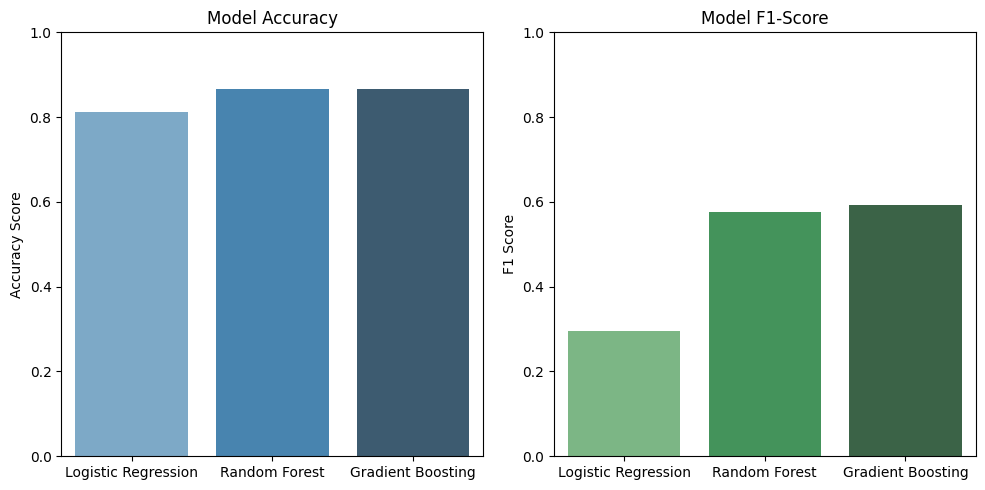

In [ ]:
# Plotting
plt.figure(figsize=(10,5))

# Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=accuracies, palette='Blues_d')
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy Score")

# F1 Score
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=f1_scores, palette='Greens_d')
plt.ylim(0, 1)
plt.title("Model F1-Score")
plt.ylabel("F1 Score")

plt.tight_layout()
plt.show()


In [20]:
# Store metrics for plotting
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
accuracies = []
f1_scores = []

# Evaluate each model and store metrics
for name, pred in zip(model_names, [lr_preds, rf_preds, gb_preds]):
    acc = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    accuracies.append(acc)
    f1_scores.append(f1)

# Plotting
plt.figure(figsize=(10,5))

# Accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=model_names, y=accuracies, palette='Blues_d')
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy Score")

# F1 Score
plt.subplot(1, 2, 2)
sns.barplot(x=model_names, y=f1_scores, palette='Greens_d')
plt.ylim(0, 1)
plt.title("Model F1-Score")
plt.ylabel("F1 Score")

plt.tight_layout()
plt.show()

NameError: name 'lr_preds' is not defined